In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.integrate import odeint

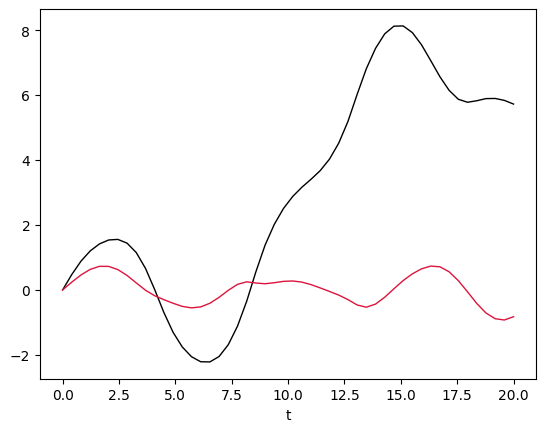

In [31]:
def model(x, t, w):
    phi, theta, v_phi, v_theta = x
    m, M = w
    f1 = np.cos(theta-phi)
    f2 = m/(M+m)*np.cos(theta-phi)
    g1 = (v_theta**2)*np.sin(theta-phi) - np.sin(phi)
    g2 = (v_phi**2)*(-m/(M+m)*np.sin(theta-phi)) - np.sin(theta)
    a_phi = (g1-f1*g2) / (1-f1*f2)
    a_theta = (-f2*g1+g2) / (1-f1*f2)
    return [v_phi, v_theta, a_phi, a_theta]

# initial conditions
m = 1 # kg
M = 5 # kg
phi0 = 0
theta0 = 0
v_phi0 = 1.2
v_theta0 = 0.6
t = np.linspace(0, 20)

phi, theta, v_phi, v_theta = odeint(model, [phi0, theta0, v_phi0, v_theta0], t, args=([m, M],)).T

plt.plot(t, phi, c='black', lw=1)
plt.plot(t, theta, c='crimson', lw=1)
plt.xlabel('t')
plt.show()